In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
file_path = "BigBasket Products.csv"  # Ensure the CSV file is in the same directory as this script
df = pd.read_csv(file_path)

In [2]:
# Display the first few rows to check data
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   index                                            product  \
0      1             Garlic Oil - Vegetarian Capsule 500 mg   
1      2                              Water Bottle - Orange   
2      3                     Brass Angle Deep - Plain, No.2   
3      4  Cereal Flip Lid Container/Storage Jar - Assort...   
4      5                 Creme Soft Soap - For Hands & Body   

                 category           sub_category              brand  \
0        Beauty & Hygiene              Hair Care  Sri Sri Ayurveda    
1  Kitchen, Garden & Pets  Storage & Accessories         Mastercook   
2    Cleaning & Household            Pooja Needs                Trm   
3    Cleaning & Household   Bins & Bathroom Ware             Nakoda   
4        Beauty & Hygiene       Bath & Hand Wash              Nivea   

   sale_price  market_price                      type  rating  \
0       220.0         220.0          Hair Oil & Serum     4.1   
1       180.0         180.0    Water & Fridge B

In [3]:
# Select relevant columns for clustering
clustering_data = df[['sale_price', 'market_price', 'rating']].copy()

# Handle missing values (drop rows with NaN)
clustering_data = clustering_data.dropna()

# Standardize the data (important for K-Means)
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

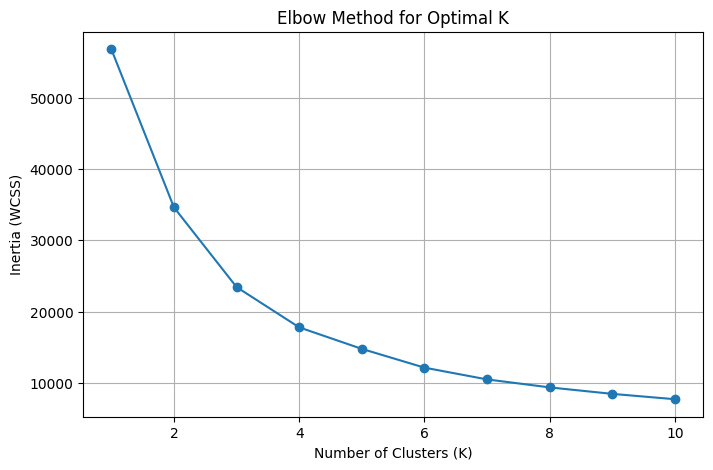

In [4]:
# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid(True)
plt.show()

Clustering complete! Results saved to 'BigBasket_Clustered.csv'.


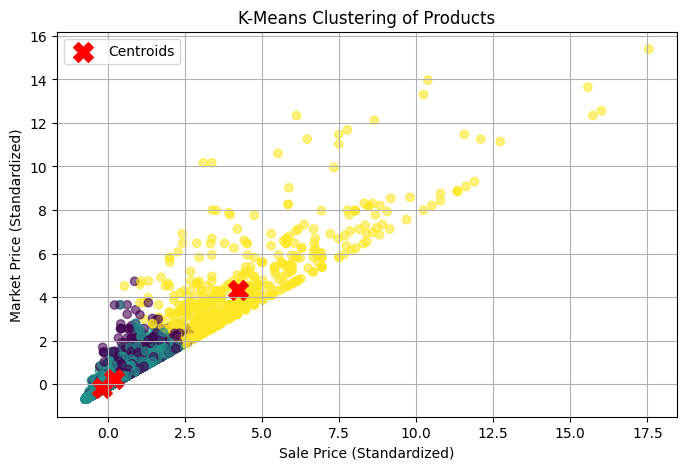

In [6]:
# Choose optimal K
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(clustering_scaled)

# Assign clusters ONLY to the rows used in clustering
clustering_data["Cluster"] = clusters

# Merge with the original dataset to keep all columns
df = df.merge(clustering_data[["Cluster"]], left_index=True, right_index=True, how="left")

# Save clustered data to a new CSV file
df.to_csv("BigBasket_Clustered.csv", index=False)
print("Clustering complete! Results saved to 'BigBasket_Clustered.csv'.")

# Visualizing the Clusters
plt.figure(figsize=(8, 5))
plt.scatter(clustering_scaled[:, 0], clustering_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Sale Price (Standardized)")
plt.ylabel("Market Price (Standardized)")
plt.title("K-Means Clustering of Products")
plt.legend()
plt.grid(True)
plt.show()

Clustering complete! Results saved to 'BigBasket_Clustered.csv'.


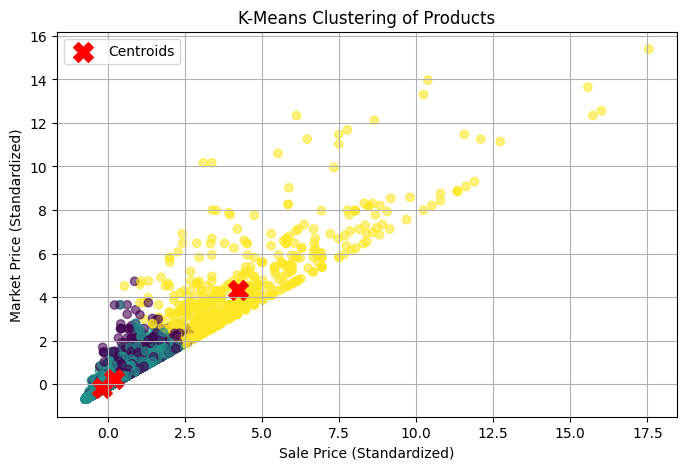

In [8]:
# Choose optimal K
optimal_k = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(clustering_scaled)

# Assign clusters ONLY to the rows used in clustering
clustering_data["Cluster"] = clusters

# Merge with the original dataset to keep all columns
df = df.merge(clustering_data[["Cluster"]], left_index=True, right_index=True, how="left")

# Save clustered data to a new CSV file
df.to_csv("BigBasket_Clustered.csv", index=False)
print("Clustering complete! Results saved to 'BigBasket_Clustered.csv'.")

# Visualizing the Clusters
plt.figure(figsize=(8, 5))
plt.scatter(clustering_scaled[:, 0], clustering_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Sale Price (Standardized)")
plt.ylabel("Market Price (Standardized)")
plt.title("K-Means Clustering of Products")
plt.legend()
plt.grid(True)
plt.show()

          sale_price  market_price    rating
Cluster                                     
0.0       342.397843    421.487394  2.626558
1.0       196.454221    229.924789  4.187349
2.0      1810.605267   2304.099828  3.826162


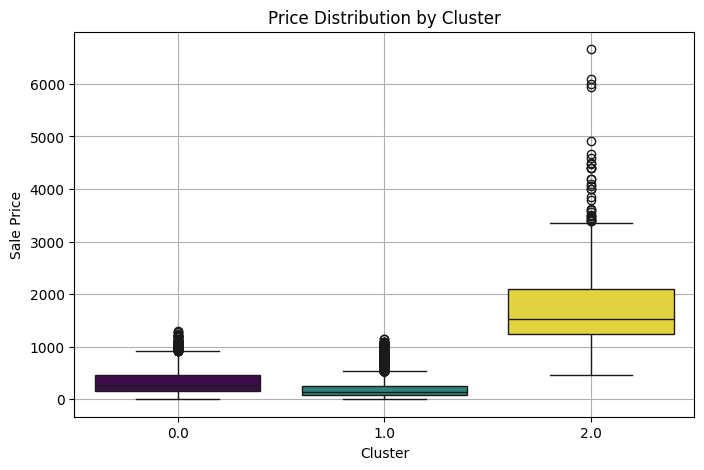

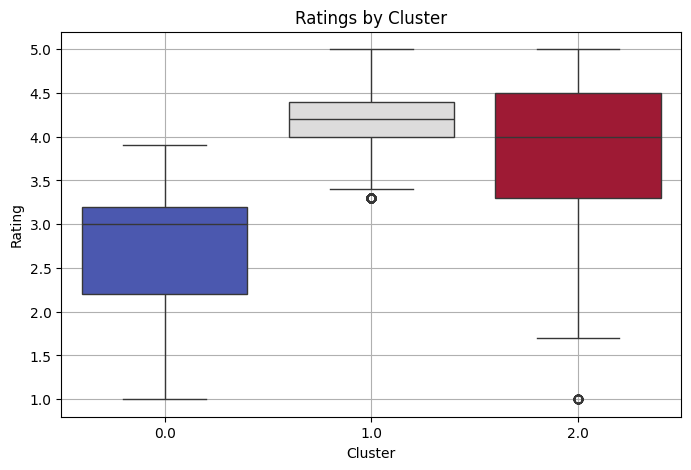

In [10]:
# Calculate cluster-wise summary statistics
cluster_summary = df.groupby("Cluster")[["sale_price", "market_price", "rating"]].mean()

# Display the cluster summary
print(cluster_summary)

import seaborn as sns

# Boxplot to show the price distribution across clusters
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Cluster"], y=df["sale_price"], hue=df["Cluster"], palette="viridis", legend=False)
plt.xlabel("Cluster")
plt.ylabel("Sale Price")
plt.title("Price Distribution by Cluster")
plt.grid(True)
plt.show()

# Boxplot for Ratings across clusters
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Cluster"], y=df["rating"], hue=df["Cluster"], palette="coolwarm", legend=False)
plt.xlabel("Cluster")
plt.ylabel("Rating")
plt.title("Ratings by Cluster")
plt.grid(True)
plt.show()